In [43]:
%matplotlib notebook
import numpy as np

G = 1  # km**3/(kg * s**2)
m_1 = 1
m_2 = 3e-6+3.6e-8  # kg

R_1_0 = np.array((-0.000003, 0))  # km
R_2_0 = np.array((1.0002934, 0))  # km
dotR_1_0 = np.array((0, -3.017052e-6))  # km/s
dotR_2_0 = np.array((0, 0.99985))  # km/s
#-0.000003, 0., 1.0002934, 0., 0., -3.017052e-6, 0., -0.99985

y_0 = np.hstack((R_1_0, R_2_0, dotR_1_0, dotR_2_0))

In [44]:
X_1 = y_0[0]
Y_1 = y_0[1]

X_2 = y_0[2]
Y_2 = y_0[3]


r = np.sqrt((X_2 - X_1) ** 2 + (Y_2 - Y_1) ** 2 + (Z_2 - Z_1) ** 2)

ddotX_1 = G * m_2 * (X_2 - X_1) / r ** 3
ddotY_1 = G * m_2 * (Y_2 - Y_1) / r ** 3
ddotZ_1 = G * m_2 * (Z_2 - Z_1) / r ** 3
ddotX_2 = -G * m_1 * (X_2 - X_1) / r ** 3
ddotY_2 = -G * m_1 * (Y_2 - Y_1) / r ** 3
ddotZ_2 = -G * m_1 * (Z_2 - Z_1) / r ** 3

In [45]:
R_1 = y_0[:2]
R_2 = y_0[2:4]

r = np.sqrt(np.sum(np.square(R_2 - R_1)))
ddot = G * (R_2 - R_1) / r ** 3
ddotR_1_0 = m_2 * ddot
ddotR_2_0 = -m_1 * ddot


In [46]:
Delta_t = 1  # s
dotR_1_1 = ddotR_1_0 * Delta_t + dotR_1_0
dotR_2_1 = ddotR_2_0 * Delta_t + dotR_2_0

R_1_1 = dotR_1_0 * Delta_t + R_1_0
R_2_1 = dotR_2_0 * Delta_t + R_2_0

In [47]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [48]:
def absolute_motion(t, y):
    """Calculate the motion of a two-body system in an inertial reference frame.

    The state vector ``y`` should be in the order:

    1. Coordinates of $m_1$
    2. Coordinates of $m_2$
    3. Velocity components of $m_1$
    4. Velocity components of $m_2$
    """
    # Get the six coordinates for m_1 and m_2 from the state vector
    R_1 = y[:2]
    R_2 = y[2:4]

    # Fill the derivative vector with zeros
    ydot = np.zeros_like(y)

    # Set the first 6 elements of the derivative equal to the last
    # 6 elements of the state vector, which are the velocities
    ydot[:4] = y[4:]

    # Calculate the acceleration terms and fill them in to the rest
    # of the derivative array
    r = np.sqrt(np.sum(np.square(R_2 - R_1)))
    ddot = G * (R_2 - R_1) / r ** 3
    ddotR_1 = m_2 * ddot
    ddotR_2 = -m_1 * ddot

    ydot[4:6] = ddotR_1
    ydot[6:] = ddotR_2
    return ydot

In [51]:
t_0 = 0  # seconds
t_f = 480  # seconds
t_points = np.linspace(t_0, t_f, 10000)

sol = solve_ivp(absolute_motion, [t_0, t_f], y_0, t_eval=t_points)

y = sol.y.T
R_1 = y[:, :2]  # km
R_2 = y[:, 2:4]  # km
V_1 = y[:, 4:6]  # km/s
V_2 = y[:, 6:]  # km/s



<IPython.core.display.Javascript object>


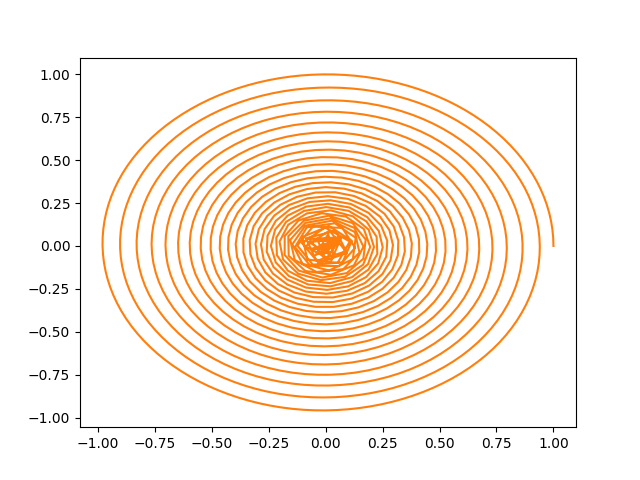

In [52]:
plt.plot(sol.y[0, :], sol.y[1, :])
plt.plot(sol.y[2, :], sol.y[3, :])

In [1]:
def N_body_update_2D(t, init_list):
    """Updates positions and velocities for N bodies, assumes masses of all bodies and G = 1 
    and position and velocity vectors to be 2D.
    
    Inputs:
    t: time variable
    init_list: list of initial and newly calcualated positions and velocities
    
    Returns:
    next_val: Array containing updated values based on differential equations
    """
    
    
    v_index = int(len(init_list)/2)
    next_v = []
    next_r = []
    
    for i in range(0, v_index, 2):
        r_i = init_list[i:i+2]
        v_i = init_list[v_index + i: v_index + i + 2]
        
        r_other = init_list[:v_index]
        r_other = np.concatenate((r_other[:i], r_other[i+2:]))
        
        v_new = np.array((0., 0.))
        for j in range(0, len(r_other), 2):
            v_new += (r_other[j:j+2] - r_i)/(np.linalg.norm(r_other[j:j+2] - r_i)**3)
        
        next_v.append(v_new)
        next_r.append(v_i)
    next_val = np.concatenate((next_r, next_v), axis=None)
    return next_val

In [ ]:
def N_body_update_2D(t, init_list):
    """Updates positions and velocities for N bodies, assumes masses of all bodies and G = 1 
    and position and velocity vectors to be 2D.
    
    Inputs:
    t: time variable
    init_list: list of initial and newly calcualated positions and velocities
    
    Returns:
    next_val: Array containing updated values based on differential equations
    """
    
    v_new = init_list[M:]
    
    a_new = 1/(np.roll())
    
